# 1. Goal

   ## Develop a model to predict the amount that customers are willing to pay 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv('Car_Purchasing_Data.csv',encoding='latin')

In [3]:
df.head(15)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,Somalia,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


In [4]:
df.shape

(500, 9)

In [5]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


# 2. Data pre-processing

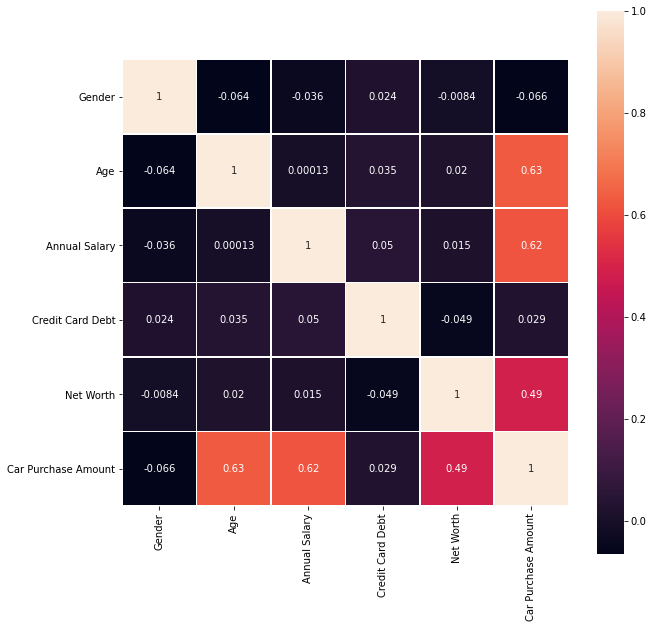

In [6]:
co_relation_matrix = df.corr(method = 'pearson')
plt.subplots(figsize =(10, 10)) 
sns.heatmap(co_relation_matrix, square = True, linewidths = 0.5, annot=True)

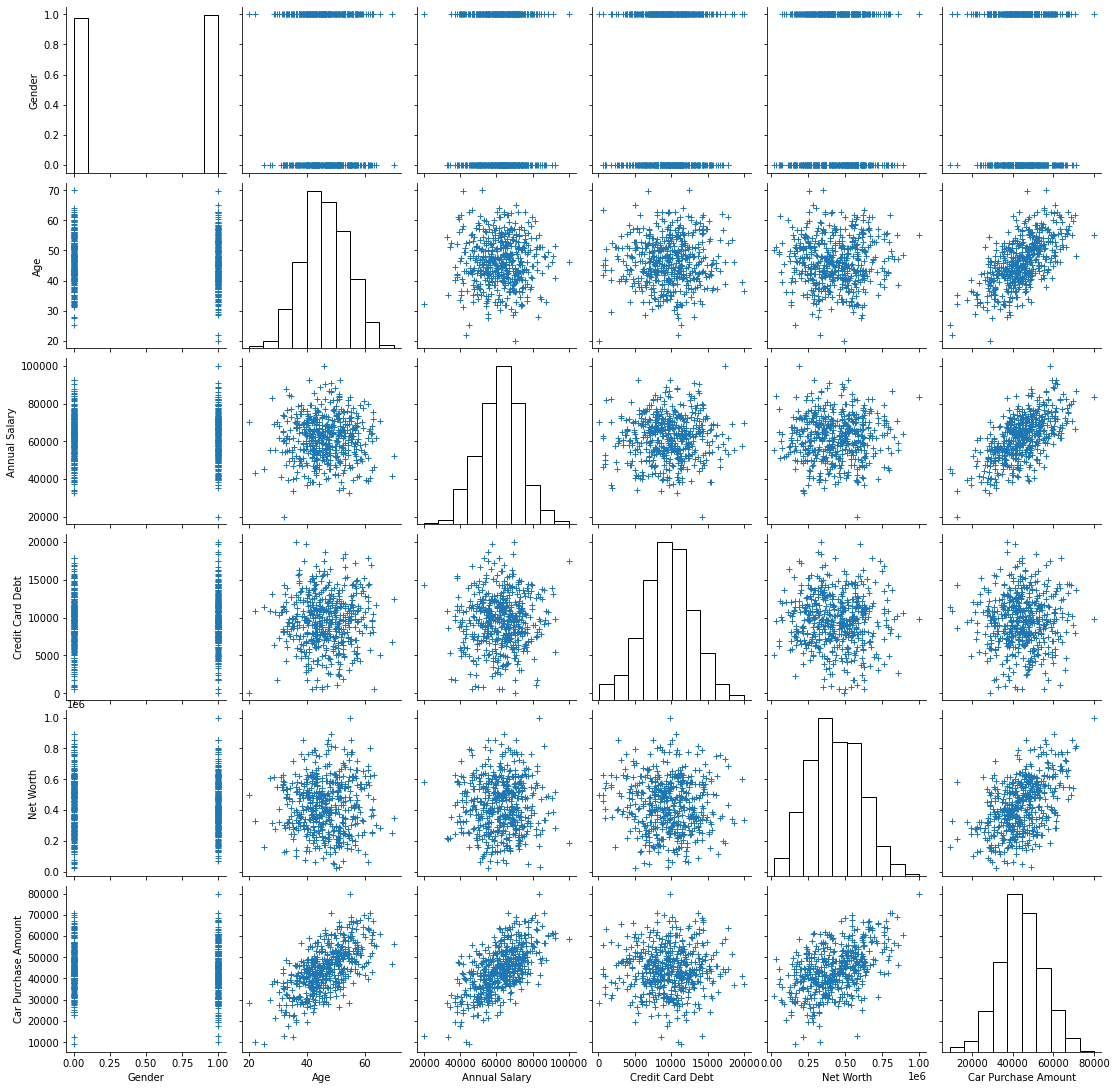

In [7]:
sns.pairplot(df, plot_kws=dict(marker="+", linewidth=1),diag_kws=dict(fill=False))

In [8]:
X = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [9]:
y = df['Car Purchase Amount']
y = y.values.reshape(-1,1)

In [10]:
X.shape

(500, 5)

In [11]:
y.shape

(500, 1)

In [12]:
sc_X = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)

In [13]:
sc_y = MinMaxScaler()
y_scaled = sc_y.fit_transform(y)

In [14]:
print(X_scaled)

[[0.         0.4370344  0.53515116 0.57836085 0.22342985]
 [0.         0.41741247 0.58308616 0.476028   0.52140195]
 [1.         0.46305795 0.42248189 0.55579674 0.63108896]
 ...
 [1.         0.67886994 0.61110973 0.52822145 0.75972584]
 [1.         0.78321017 0.37264988 0.69914746 0.3243129 ]
 [1.         0.53462305 0.51713347 0.46690159 0.45198622]]


# 3. Model Training

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.3)

## Building the neural network

In [16]:
# Sequential is used to build the NN for left to right through hidden layers. Just like building a LEGO
model = Sequential()
# Dense will help us to connect the outputs of one layer to the hidden layers in a packed dense fashion
# I am going to use 30 neurons in the hidden layer and relu as my activation function
model.add(Dense(30, input_dim=5, activation='relu'))
# then another hidden layer with 30 neurons and relu activation function.
model.add(Dense(30, activation='relu'))
# Since i will be predicting only one value i am going to use linear activation function in the final layer.
model.add(Dense(1, activation='linear'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
model_train = model.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_split=0.20)

Epoch 1/100
6/6 [==============================] - 1s 151ms/step - loss: 0.1077 - val_loss: 0.0644
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0490 - val_loss: 0.0384
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0264 - val_loss: 0.0360
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0256 - val_loss: 0.0310
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0227 - val_loss: 0.0235
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0156 - val_loss: 0.0189
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0145 - val_loss: 0.0159
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0123 - val_loss: 0.0136
Epoch 9/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0110 - val_loss: 0.0120
Epoch 10/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0094 - val_loss: 0.0108
Epoch 11/100
6/6 [=========

6/6 [==============================] - 0s 7ms/step - loss: 7.5866e-05 - val_loss: 1.5143e-04
Epoch 82/100
6/6 [==============================] - 0s 7ms/step - loss: 6.9589e-05 - val_loss: 1.5292e-04
Epoch 83/100
6/6 [==============================] - 0s 7ms/step - loss: 7.0015e-05 - val_loss: 1.5793e-04
Epoch 84/100
6/6 [==============================] - 0s 7ms/step - loss: 7.0638e-05 - val_loss: 1.5067e-04
Epoch 85/100
6/6 [==============================] - 0s 7ms/step - loss: 6.4377e-05 - val_loss: 1.3033e-04
Epoch 86/100
6/6 [==============================] - 0s 7ms/step - loss: 7.5905e-05 - val_loss: 1.4913e-04
Epoch 87/100
6/6 [==============================] - 0s 7ms/step - loss: 5.5450e-05 - val_loss: 1.3081e-04
Epoch 88/100
6/6 [==============================] - 0s 7ms/step - loss: 6.1682e-05 - val_loss: 1.3901e-04
Epoch 89/100
6/6 [==============================] - 0s 7ms/step - loss: 5.5625e-05 - val_loss: 1.2739e-04
Epoch 90/100
6/6 [==============================] - 0s 7ms/

# 4. Model Evaluation

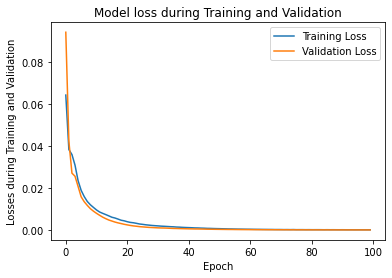

In [20]:
names = list(model_train.history.keys())
plt.plot(model_train.history[names[1]])
plt.plot(model_train.history[names[0]])

plt.title('Model loss during Training and Validation')
plt.ylabel('Losses during Training and Validation')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])


# 5. Model Testing

In [21]:
for i in range(5):
    print("X = ",list(X_scaled)[i],"  y = ",list(y)[i])

X =  [0.         0.4370344  0.53515116 0.57836085 0.22342985]   y =  [35321.45877]
X =  [0.         0.41741247 0.58308616 0.476028   0.52140195]   y =  [45115.52566]
X =  [1.         0.46305795 0.42248189 0.55579674 0.63108896]   y =  [42925.70921]
X =  [1.         0.76542739 0.74212547 0.71990778 0.53938679]   y =  [67422.36313]
X =  [1.         0.74627499 0.49661439 0.26425689 0.55133068]   y =  [55915.46248]


In [22]:
X_test_sample = np.array([[0, 0.4370344,  0.53515116, 0.57836085, 0.22342985]])
y_predict = model.predict(X_test_sample)
y_predict_reverse_transform = sc_y.inverse_transform(y_predict)
print('Expected Purchase Amount scaled=', y_predict)
print('Expected Purchase Amount in dollars=', y_predict_reverse_transform)

Expected Purchase Amount scaled= [[0.37163755]]
Expected Purchase Amount in dollars= [[35386.266]]


# 6. Evaluating the Neural Network Performance against Classical Regression Models

## 6.1 Model = Linear Regression

MSE : 4.6475207277803143e-10
R^2 score:   0.9999999783783337
Expected Purchase Amount scaled= [[0.37071274]]
Expected Purchase Amount in dollars= [[35320.60447487]]


Text(0.5, 1.0, 'Scatter plot from actual y and predicted y for validation set')

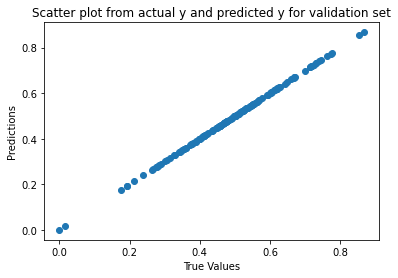

In [23]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_test_predict = model_1.predict(X_test)
r2 = r2_score(y_test, y_test_predict)

mse = np.mean((y_test - y_test_predict)**2, axis = None)
print("MSE :", mse)
print('R^2 score:  ',r2)

y_predict_lr = model_1.predict(X_test_sample)
y_predict_lr_reverse_transform = sc_y.inverse_transform(y_predict_lr)
print('Expected Purchase Amount scaled=', y_predict_lr)
print('Expected Purchase Amount in dollars=', y_predict_lr_reverse_transform)

plt.scatter(y_test, y_test_predict)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('Scatter plot from actual y and predicted y for validation set')

## Linear Regression was able to predict the value much closer(Just a dollar difference) than the Neural Network above. 
    1. We could change the activation funcion or number of neurons or increase the number of hidden layer to increase the efficiency of the neural network.
    
    2. The dataset being simple and all we dont have to go with neural networks to get more accurate predictions. Neural Networks could be more useful with huge datasets and with NLP or CV